## Auto MPG: PCA and tSNE

-----------------------------

-----------------------------
## Objective: 
-----------------------------
The objective of this notebook is to explore the data and reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and generate meaningful insights. 

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Importing necessary libraries and overview of the dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from matplotlib import style
style.use('dark_background')

In [15]:
data = pd.read_csv('./auto-mpg.csv')

#### Loading data

In [16]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Checking the info of the data

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Observations:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. We will explore this further.

## Data Preprocessing and Exploratory Data Analysis

In [18]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [19]:
# dropping car_name
data1 = data.copy()
data = data.drop(['car name'], axis=1)

#### Checking values in horsepower column

In [20]:
# checking if there are values other than digits in the column 'horsepower' 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print isDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


**Observations:**
- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- Let's impute these missing values and change the data type of horsepower column.
- First we need to replace the ? with np.nan.

In [21]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [22]:
# Imputing the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

#### Summary Statistics

In [23]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**Observations:**

* There don't seem to be any obvious suspicious values

* The earliest car model is from 1970 whereas the latest is from 1982

* The average MPG across the cars is 23.51, and the average horsepower is around 104.3

* The cars seem to have approximately 5.4 cylinders on average



#### Let's check the distribution and outliers for each column in the data

mpg
Skew : 0.46


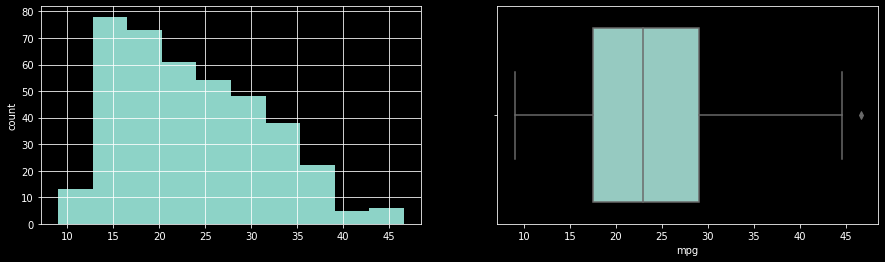

cylinders
Skew : 0.53


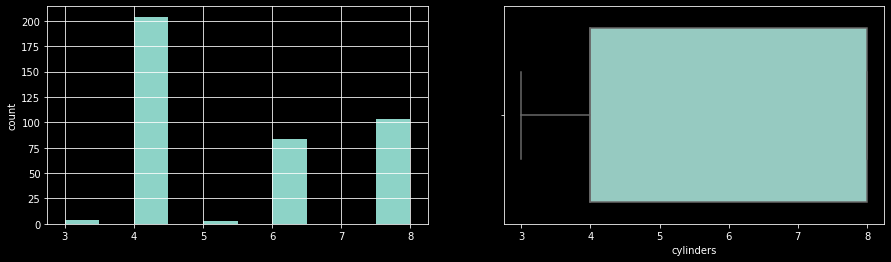

displacement
Skew : 0.72


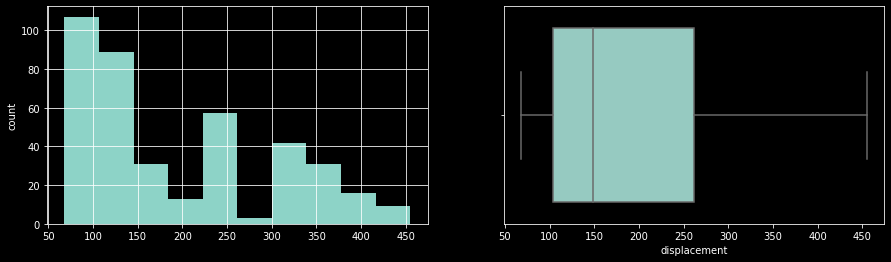

horsepower
Skew : 1.11


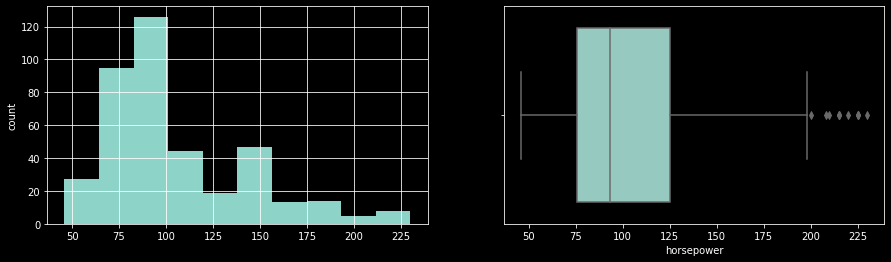

weight
Skew : 0.53


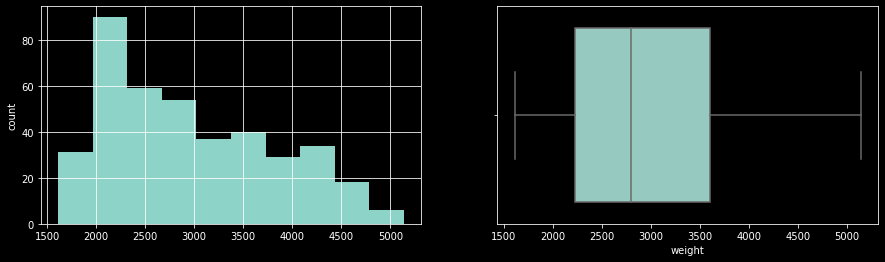

acceleration
Skew : 0.28


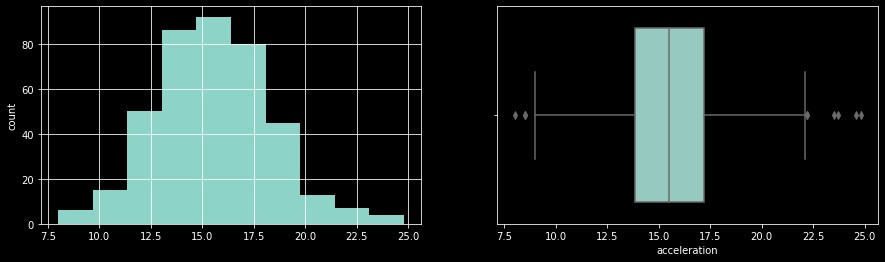

model year
Skew : 0.01


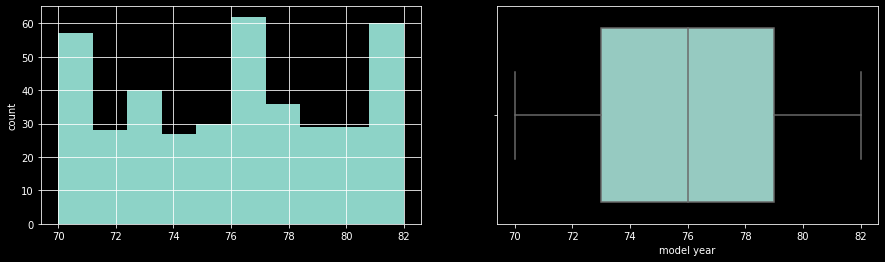

origin
Skew : 0.92


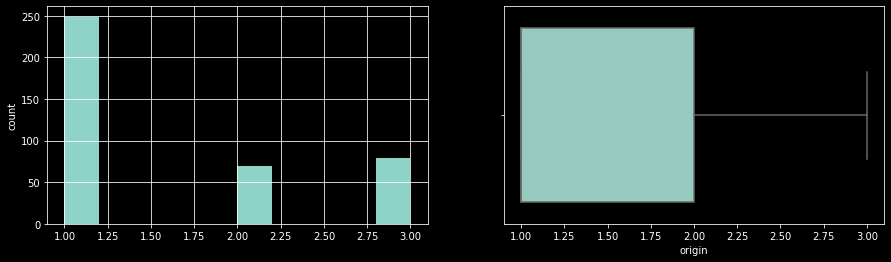

In [24]:
# Uncomment and complete the code by filling the blanks 

for col in data.columns:
     print(col)
     print('Skew :',round(data[col].skew(),2))
     plt.figure(figsize=(15,4))
     plt.subplot(1,2,1)
     data[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x= data[col])
     plt.show()

**Observations:**

* Some of the distributions seem to be skewed to the right, namely: weight, displacement, horsepower, and MPG

* Acceleration resembles a normal distribution

* A significant portion of the cars have 4 cylinders. 

#### Checking correlation

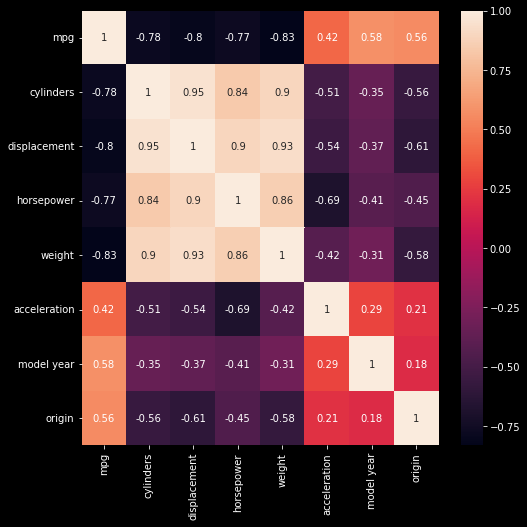

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

#### Scaling the data

In [26]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [27]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145


## Principal Component Analysis

In [28]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n,random_state = 1) #Applying the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fitting and transforming the pca function on scaled data

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

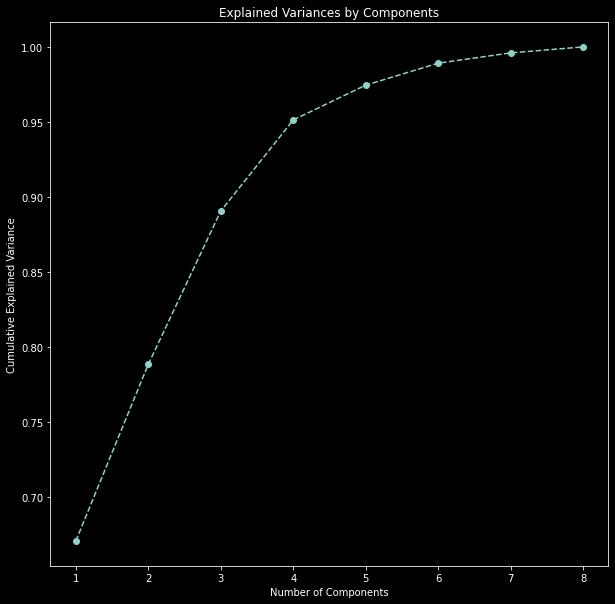

In [29]:
# visualizing the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,9), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [30]:
# finding the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  4


**Observations:**

* We can see that a large percentage of the variation can be explained by 4 principal components. More specifically, they explain almost 95% of the variance as we can see in the above results. 

* This lets us reduce the number of dimensions significantly. 

In [31]:
pca.components_

array([[-0.38580893,  0.40275959,  0.41695876,  0.40163702,  0.40191954,
        -0.26458518, -0.2140129 , -0.27644732],
       [-0.06873237, -0.13118279, -0.12300984,  0.11329144, -0.21128731,
        -0.42732664, -0.679168  ,  0.51144991],
       [-0.29486219, -0.07629121, -0.07813473, -0.23423139, -0.00840912,
         0.62641658, -0.60100665, -0.3042846 ],
       [-0.10121929,  0.2173406 ,  0.13710384,  0.11248961,  0.32291292,
         0.50030645,  0.10330125,  0.73879354],
       [-0.73828929, -0.48818552, -0.29922592,  0.07964798,  0.13872707,
        -0.1019377 ,  0.29716774,  0.05271351],
       [ 0.37980634, -0.51630682, -0.01543482,  0.68836439,  0.2102785 ,
         0.21209413, -0.10905012, -0.11831208],
       [-0.21696457,  0.30147532, -0.10164088,  0.51320815, -0.72246385,
         0.21843085,  0.1335898 , -0.02851744],
       [-0.11331691, -0.41440717,  0.82825492, -0.12150127, -0.32258118,
         0.03993869,  0.05479355,  0.07746704]])

In [32]:
pc_comps = ['PC1','PC2','PC3','PC4']
data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4
mpg,-0.39,-0.07,-0.29,-0.10
cylinders,0.40,-0.13,-0.08,0.22
displacement,0.42,-0.12,-0.08,0.14
horsepower,0.40,0.11,-0.23,0.11
weight,0.40,-0.21,-0.01,0.32
acceleration,-0.26,-0.43,0.63,0.50
model year,-0.21,-0.68,-0.60,0.10
origin,-0.28,0.51,-0.30,0.74


**Let's look at the coefficients of three principal components from the below dataframe**

In [33]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4
mpg,-0.390000,-0.070000,-0.290000,-0.100000
cylinders,0.400000,-0.130000,-0.080000,0.220000
displacement,0.420000,-0.120000,-0.080000,0.140000
horsepower,0.400000,0.110000,-0.230000,0.110000
weight,0.400000,-0.210000,-0.010000,0.320000
acceleration,-0.260000,-0.430000,0.630000,0.500000
model year,-0.210000,-0.680000,-0.600000,0.100000
origin,-0.280000,0.510000,-0.300000,0.740000


**Observations:**

* The first principle component seems to have high coefficients for cylinders, displacement, horsepower, and weight and a very low coefficient for mpg- this seems to be associated with cars that are bigger and heavier with more cylinders and less fuel efficient. 

* PC2 has a very low coefficient for model year, so it seems to be associated with cars that have typical values for older cars. 

* PC3 has a low coefficient for acceleration 

#### We can also visualize the data in 2 dimensions using first two principal components 

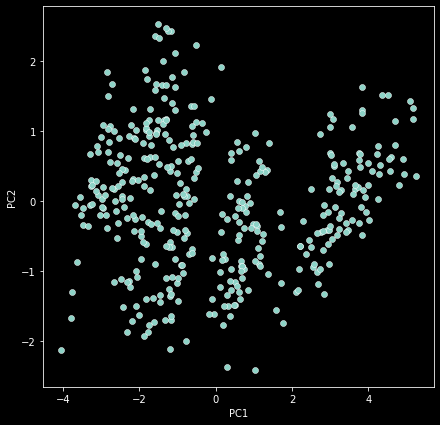

In [34]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Let's try adding hue to the scatter plot**

Text(0, 0.5, 'PC2')

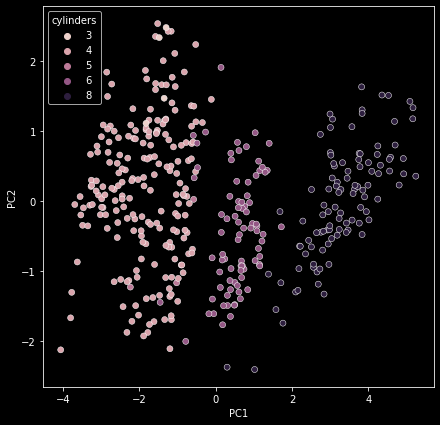

In [35]:
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (7,7))
#Create a scatter plot with x=0 and y=1 using df_concat dataframe
sns.scatterplot(x = 0, y = 1, data=df_concat, hue = 'cylinders')

plt.xlabel("PC1")
plt.ylabel("PC2")

**Observations:**

We see 3 different clusters:
* one of them has 3-5 cylinders
* the other has 6 cylinders 
* the last one has 8 cylinders

Some values overlap

## t-SNE


**We will apply the TSNE embedding with 2 components for the dataframe data_scaled**
  

In [36]:
tsne = TSNE(n_components = 2, random_state = 1)  #Applying the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(data_scaled) #Fitting and transforming tsne function on the scaled data

In [37]:
data_tsne.shape

(398, 2)

In [38]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [39]:
data_tsne.head()

,Component 1,Component 2
0,-26.238907,-27.735867
1,-24.917070,-29.176781
2,-25.815916,-28.597298
3,-25.597639,-28.098434
4,-26.189590,-28.445448


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

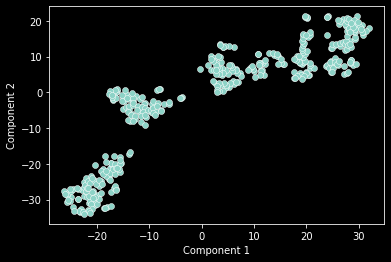

In [40]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

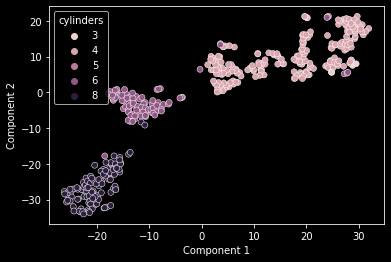

In [41]:
# Let's see scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data.cylinders)

**Observations:**

* The vizualized groups seem to be formed in a similar way as PCA however they are better separated with larger distances between clusters to make the distinctions clear

In [42]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component> 0) and (second_component >0): 
        return 'group_1'
    if (first_component >-20 ) and (second_component >-10):
        return 'group_2'
    else: 
        return 'group_3'

In [43]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

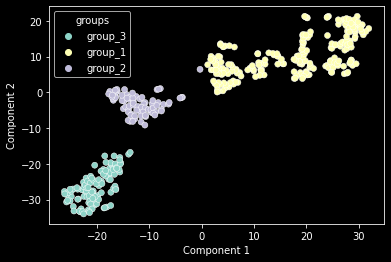

In [44]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

In [45]:
data['groups'] = data_tsne['groups'] 


**Let's take a better look at the different groups w.r.t different variables**

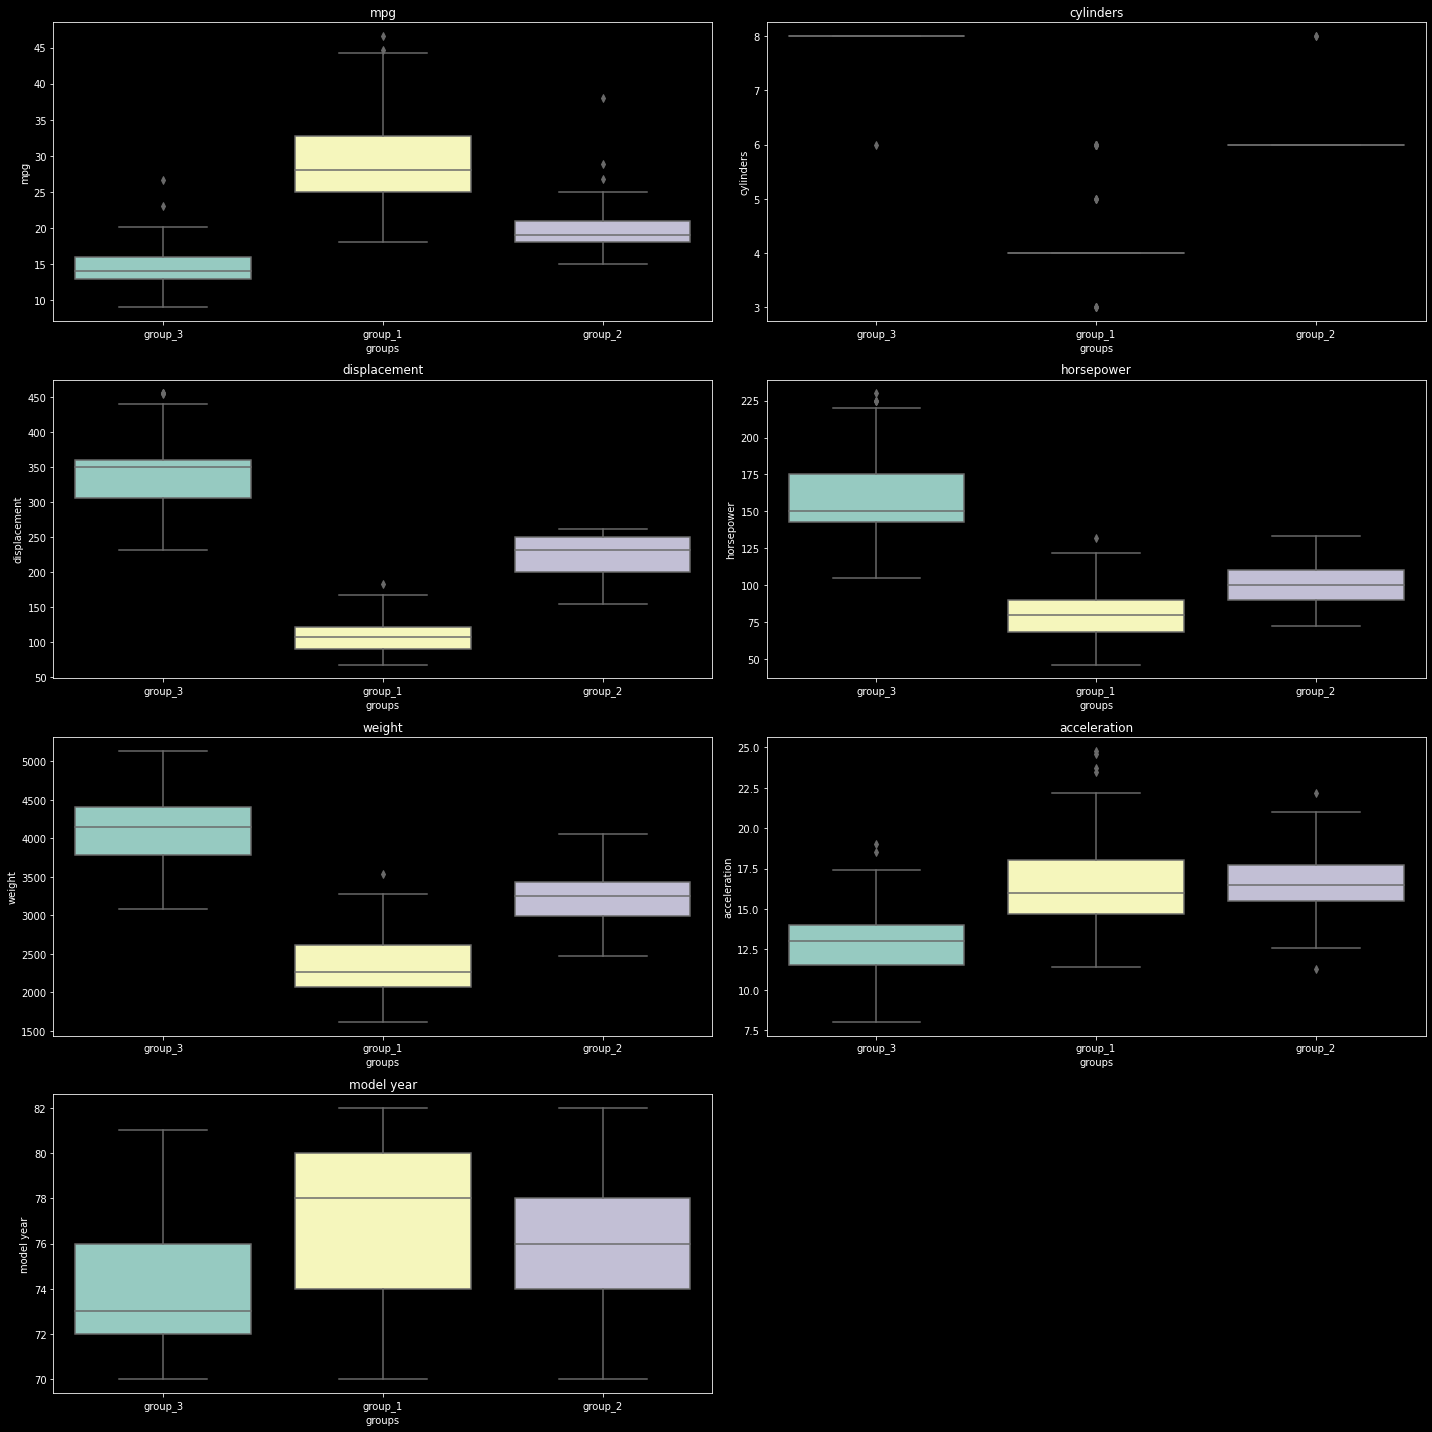

In [46]:
all_col = data.columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    #Create boxplot with groups on the x-axis and variable on the y-axis (use the dataframe data)
    sns.boxplot(x = data['groups'], y = data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [47]:
data2 = data1.copy()
data2['groups'] = data_tsne['groups']
data2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,groups
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,group_3
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,group_3
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,group_3
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,group_3
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,group_3


In [48]:
data2[data2['groups'] == 'group_1'].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,groups
14,24.0,4,113.0,95,2372,15.0,70,3,toyota corona mark ii,group_1
18,27.0,4,97.0,88,2130,14.5,70,3,datsun pl510,group_1
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan,group_1
20,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504,group_1
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls,group_1


In [49]:
data2[data2['groups'] == 'group_2'].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,groups
15,22.0,6,198.0,95,2833,15.5,70,1,plymouth duster,group_2
16,18.0,6,199.0,97,2774,15.5,70,1,amc hornet,group_2
17,21.0,6,200.0,85,2587,16.0,70,1,ford maverick,group_2
24,21.0,6,199.0,90,2648,15.0,70,1,amc gremlin,group_2
33,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin,group_2


In [50]:
data2[data2['groups'] == 'group_3'].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,groups
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,group_3
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,group_3
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,group_3
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,group_3
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,group_3


**Observations:**

* We get clear distinctions between each group across the different variables

* Group 1 seems to be more fuel efficient, simpler cars since they have higher MPG, lower weight, lower horsepower, and lower cylinders. One such example is the datsun pl510 which is a relatively smaller car. These might be the cars meant more for every day use and affordability. 

* Group 2 seems to represent the "intermediate" cars. Ones that don't have very good mpg but not as low as group 3. They seem to be mid sized, with a mid-range horsepower and cylinders. An example would be the plymouth duster. 

* Group 3 seems to be the heavier cars and faster cars that have a lot of horsepower and cylinders, they are less fuel efficient than the other categories since their MPG numbers are lower. An example would be the chevrolet chevelle malibu.   